In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car evaluation_with.csv")

In [3]:
print(df.head(5))

   vhigh vhigh.1  2  2.1  small   med  unacc
0  vhigh   vhigh  2    2  small  high  unacc
1  vhigh   vhigh  2    2    med   low  unacc
2  vhigh   vhigh  2    2    med   med  unacc
3  vhigh   vhigh  2    2    med  high  unacc
4  vhigh   vhigh  2    2    big   low  unacc


In [5]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
print(df.head())

  buying  maint  doors  persons lug_boot safety  class
0  vhigh  vhigh      2        2    small   high  unacc
1  vhigh  vhigh      2        2      med    low  unacc
2  vhigh  vhigh      2        2      med    med  unacc
3  vhigh  vhigh      2        2      med   high  unacc
4  vhigh  vhigh      2        2      big    low  unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1726 non-null   object
 1   maint     1726 non-null   object
 2   doors     1726 non-null   int64 
 3   persons   1726 non-null   int64 
 4   lug_boot  1726 non-null   object
 5   safety    1726 non-null   object
 6   class     1726 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.5+ KB


In [8]:
df.describe()

,doors,persons
count,1726.000000,1726.000000
mean,3.501738,3.668598
std,1.117838,1.247011
min,2.000000,2.000000
25%,3.000000,2.000000
50%,4.000000,4.000000
75%,4.750000,5.000000
max,5.000000,5.000000


In [9]:
df.shape

(1726, 7)

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [12]:
print(df.head(10))

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      2        2         2       0      2
1       3      3      2        2         1       1      2
2       3      3      2        2         1       2      2
3       3      3      2        2         1       0      2
4       3      3      2        2         0       1      2
5       3      3      2        2         0       2      2
6       3      3      2        2         0       0      2
7       3      3      2        4         2       1      2
8       3      3      2        4         2       2      2
9       3      3      2        4         2       0      2


In [13]:
X = df.drop("class", axis=1)
y = df["class"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.869942196531792
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        71
           1       0.00      0.00      0.00        14
           2       0.94      0.96      0.95       250
           3       0.46      1.00      0.63        11

    accuracy                           0.87       346
   macro avg       0.54      0.67      0.58       346
weighted avg       0.85      0.87      0.86       346



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

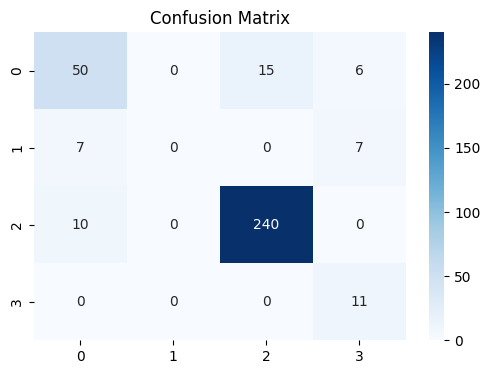

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d', ax = ax, cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show()

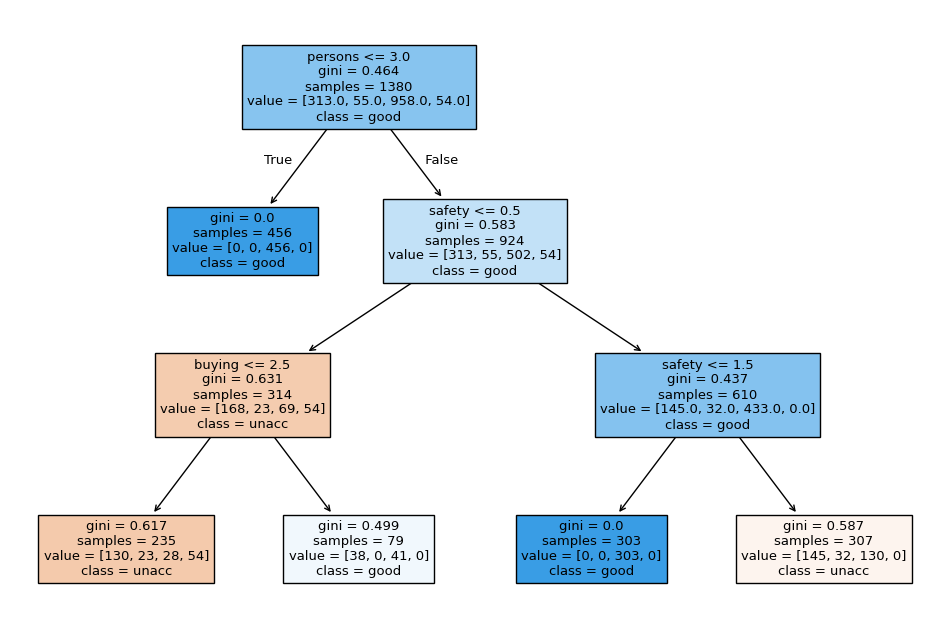

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True,  feature_names=X.columns ,class_names=['unacc', 'acc', 'good', 'vgood'])
plt.show()

In [28]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits= 5, shuffle=True, random_state = 42)
scores = cross_val_score(dt, X, y, cv=kf)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean(scores))
print("Standard Deviation of Cross-Validation Scores: ", np.std(scores))
print("Maximum Cross-Validation Score: ", np.max(scores))

Cross-Validation Scores:  [0.78323699 0.8        0.76231884 0.75942029 0.7826087 ]
Mean Cross-Validation Score:  0.7775169640613219
Standard Deviation of Cross-Validation Scores:  0.014984017854466444
Maximum Cross-Validation Score:  0.8
